### Your notebook should begin with a `project overview and goals` <br><br>and end with a `conclusion` that talks about your `original goals` <br><br>and how you reached those (or didn't), <br><br>the —`key findings`,<br><br>— `recommendations` and <br><br>—`next steps` ("If I had more time, I would...")

# Project Overview

1. Business Goals
  - Find drivers for customer churn at Telco
    - Who churns and why...??
  - Construct a Machine Learning model that will accurately predict customer churn.<br><br>
  
2. Wrangle the Data
  - Examine the needed data on a MySQL database
  - Import and Cache the Data for use in a Jupyter Notebook
  - Clean and Tidy the Data<br><br>

3. Expore the Data for trends and relationships
  - More pertinent information is icluded here while there is also a reference `telco_exploration_notebook.ipynb` file with addition exploration for perusal
  - Separation of the Data into subsets, namely:
    - Train
    - Validate
    - Test
      - These isolated sets of data will be nescesary to show veracity and reproducability
  - Create and Test Hypothesies of trends, relationships, and correlations
  - Visualize the Data for better conceptualization of it<br><br>
  
4. Use the Data to train Machine Learning models
  - Evaluate the ML Models for accuracy and recall
  - Determine the best models and features through iterative processes
  - Bring these models to management<br>
  <br>
5. Conclusion
  - What are the key takeaways?
  - Did we find drviers of churn? Do our models work?
  - What steps might be taken to detect and prevent churn?
  - What's next? Is there more information to be gleaned?

#  Wrangle The Data!

In [1]:
# We need to import some libraries and functions
from telco_setup import telco_imports
telco_imports()


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from modeling import confusion, random_forest_models
    


In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from modeling import confusion, random_forest_models

Prepared df: (7043, 16)

Train: (4057, 16)
Validate: (1409, 16)
Test: (1409, 16)


In [3]:
# Use the aqcuire file to get the data from MySQL or cache
df = acquire.get_telco_data()
# See if this is the right stuff
df.info() # Check √

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   internet_service_type  7043 non-null   object 
 9   online_security        7043 non-null   object 
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

In [4]:
# Seems there's nulls in these parts... must fix
df.total_charges.value_counts(dropna=False)

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [5]:
# Pull out our trusty ol' .fix_nulls() from prepare.py
df = prepare.fix_nulls()

In [6]:
df.total_charges.value_counts(dropna=False) # Check √

20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6534, dtype: int64

In [7]:
train, validate, test = prepare.split_data(df, 'churn')

Prepared df: (7043, 22)

Train: (4225, 22)
Validate: (1409, 22)
Test: (1409, 22)


  - Exploration should be refined in the report because now you know which visualizations and tests led to valuable outcomes.
  
  

In [8]:
# Here we are going to start examining our training data 
# First let's print the commands to look at 
# every individual field and how it realates to churn
for i in train:
    print(f"sns.histplot(data=train, \
    y='{i}', hue='churn', multiple='stack')"
         )
    print(f"train['{i}'][df.churn == 'Yes'].value_counts()")
    print(f"train['{i}'][df.churn == 'No'].value_counts()")    

sns.histplot(data=train,     y='customer_id', hue='churn', multiple='stack')
train['customer_id'][df.churn == 'Yes'].value_counts()
train['customer_id'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='gender', hue='churn', multiple='stack')
train['gender'][df.churn == 'Yes'].value_counts()
train['gender'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='senior_citizen', hue='churn', multiple='stack')
train['senior_citizen'][df.churn == 'Yes'].value_counts()
train['senior_citizen'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='partner', hue='churn', multiple='stack')
train['partner'][df.churn == 'Yes'].value_counts()
train['partner'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='dependents', hue='churn', multiple='stack')
train['dependents'][df.churn == 'Yes'].value_counts()
train['dependents'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='tenure', hue='churn', multiple='stack')
train['tenure'][df.

1. 
  - Include at least 4 visualizations in the form of:

    - Question in markdown that you want to answer

    - visualization

    - statistical test (in at least 2 of your 4)

    - Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

## Is there a difference in Churn rates based on Gender?
- Let's take a look...

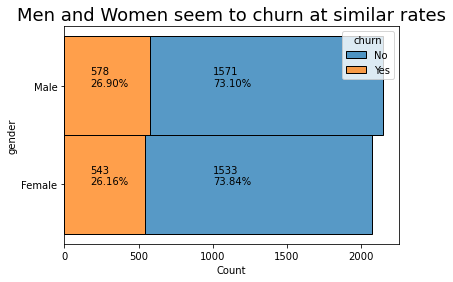

In [9]:
# Use a histograph showing gender and the % of churn in each
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
# Always title plots, graphs, and charts
plt.title('Men and Women seem to churn at similar rates',
          fontdict={'fontsize':18}
         )
plt.text(175,'Male',f'578\n{Percent(578/(578+1571))}')
plt.text(175,"Female", f'543\n{Percent(543/(543+1533))}')
plt.text(1000,'Male', f'1571\n{Percent(1571/(578+1571))}')
plt.text(1000,'Female', f'1533\n{Percent(1533/(543+1533))}')
plt.show()

##  That doesn't look like a difference... Is it?

In [10]:
males = train.churn[train.gender == 'Male'].map({'No':0,
                                                 'Yes':1
                                                })
# By dividing churn into male and female groups and mapping
# No churn and Yes churn to 0 and 1 respectively we can
# test the means of the different groups to see if they are different

females = train.churn[train.gender == 'Female'].map({'No':0,
                                                 'Yes':1
                                                })

## We'll make Hypotheses we can test!<br>
_______________
$Hₒ$ : There is no difference in churn of Males, vs churn of Females<br><br>
$Hₐ$ : Males churn in different amounts than Females churn
__________________________________________________________

### <br>Get the Means of the distributions
_____________

In [11]:
μ_males = males.mean()
μ_females = females.mean()

In [12]:
μ_females, μ_males

(0.2615606936416185, 0.26896230805025595)

**Set Alpha**

In [13]:
α = .05

**Verify Assumptions**

1. Independent Samples. YES! no observations in male sample exist in the female sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal, but let's use a levene test to find out).

In [14]:
tstat, pval = stats.levene(males, females)

In [15]:
tstat, pval

(0.2966476690943107, 0.5860204625545165)

**As fate would have it:** our varience seems similar

In [16]:
t,p = stats.ttest_ind(females, males)
t,p

(-0.5446537148448641, 0.5860204625544931)

### We **Cannot Reject** the $H_0$: Null hypothesis

2. 
  - Include at least 4 visualizations in the form of:

    - Question in markdown that you want to answer

    - visualization

    - statistical test (in at least 2 of your 4)

    - Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

**Do you think senior citizens make up much of the customer base?**

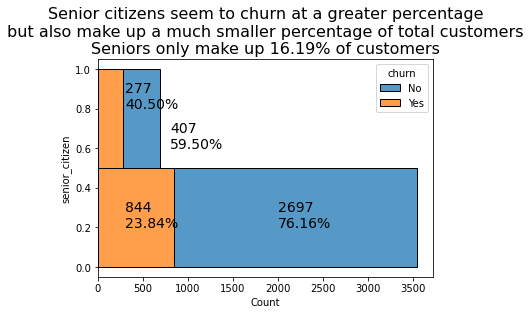

In [17]:
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack', bins=2)

plt.text(300,.8,f'277\n{Percent(277/(277+407))}',fontdict={'fontsize':14})
plt.text(800,.6,f'407\n{Percent(407/(277+407))}',fontdict={'fontsize':14})
plt.text(300,.2,f'844\n{Percent(844/(844+2697))}',fontdict={'fontsize':14})
plt.text(2000,.2,f'2697\n{Percent(2697/(844+2697))}',fontdict={'fontsize':14})
plt.title(f'Senior citizens seem to churn at a greater percentage\n\
but also make up a much smaller percentage of total customers\n\
Seniors only make up {Percent((277+407)/(277+407+844+2697))} of customers',
          fontdict={'fontsize':16}
         )
plt.show()

3. 
  - Include at least 4 visualizations in the form of:

    - Question in markdown that you want to answer

    - visualization

    - statistical test (in at least 2 of your 4)

    - Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

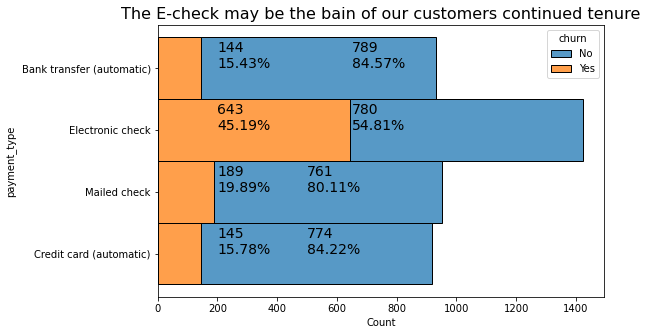

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=train, y='payment_type', hue='churn', multiple='stack')
plt.title('The E-check may be the bain of our customers continued tenure',
          fontdict={'fontsize':16}
         )
# Bank transfer (automatic)
plt.text(200, 'Bank transfer (automatic)', f'{144}\n{Percent(144/(144+789))}',fontdict={'fontsize':14})
plt.text(650, 'Bank transfer (automatic)', f'{789}\n{Percent(789/(144+789))}',fontdict={'fontsize':14})

# Electronic Check
plt.text(200, 'Electronic check', f'{643}\n{Percent(643/(643+780))}',fontdict={'fontsize':14})
plt.text(650, 'Electronic check', f'{780}\n{Percent(780/(643+780))}',fontdict={'fontsize':14})

# Mailed Check
plt.text(200, 'Mailed check', f'{189}\n{Percent(189/(189+761))}',fontdict={'fontsize':14})
plt.text(500, 'Mailed check', f'{761}\n{Percent(761/(189+761))}',fontdict={'fontsize':14})

# Credit Card
plt.text(200, 'Credit card (automatic)', f'{145}\n{Percent(145/(145+774))}',fontdict={'fontsize':14})
plt.text(500, 'Credit card (automatic)', f'{774}\n{Percent(774/(145+774))}',fontdict={'fontsize':14})

plt.show()

4. 
  - Include at least 4 visualizations in the form of:

    - Question in markdown that you want to answer

    - visualization

    - statistical test (in at least 2 of your 4)

    - Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

## Do people with different types of Internet service Churn differently?

In [19]:
#  isty = internet service type where churn has (Yes) happened
isty = train['internet_service_type'][df.churn == 'Yes'].value_counts()
# isty # Check √ - Index = [0]: Fiber, [1]: DSL, [2]: None

# istn = internet service type where churn has (No[t]) happened
istn = train['internet_service_type'][df.churn == 'No'].value_counts()
# istn # Check √ - Index = [0]: DSL, [1]: Fiber, [2]: None

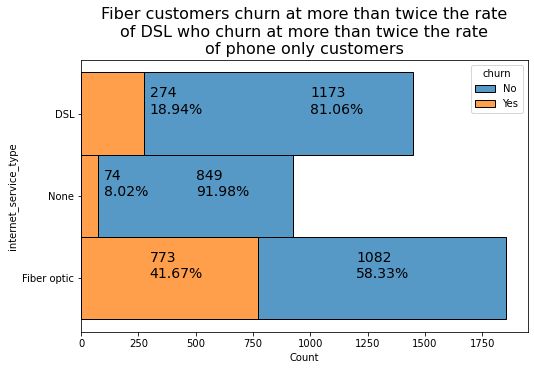

In [20]:
# plot the internet service type counts stacking churn and no churn
plt.figure(figsize=(8,5))
sns.histplot(data=train, y='internet_service_type', hue='churn', multiple='stack')
plt.title('Fiber customers churn at more than twice the rate\n\
of DSL who churn at more than twice the rate\nof phone only customers',fontdict={'fontsize':16})
# We can use the indexes to show percent of each service
#     Churn/Total in that service, and No churn/total
plt.text(300, 'DSL',f'{isty[1]}\n{Percent(isty[1]/(isty[1]+istn[0]))}',fontdict={'fontsize':14})
plt.text(1000, 'DSL',f'{istn[0]}\n{Percent(istn[0]/(isty[1]+istn[0]))}',fontdict={'fontsize':14})
plt.text(100, 'None',f'{isty[2]}\n{Percent(isty[2]/(isty[2]+istn[2]))}',fontdict={'fontsize':14})
plt.text(500, 'None',f'{istn[2]}\n{Percent(istn[2]/(isty[2]+istn[2]))}',fontdict={'fontsize':14})
plt.text(300, 'Fiber optic',f'{isty[0]}\n{Percent(isty[0]/(isty[0]+istn[1]))}',fontdict={'fontsize':14})
plt.text(1200, 'Fiber optic',f'{istn[1]}\n{Percent(istn[1]/(isty[0]+istn[1]))}',fontdict={'fontsize':14})
plt.show()

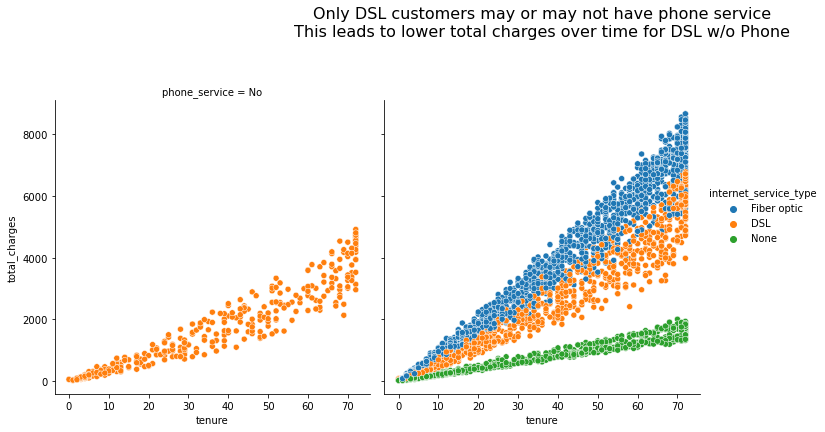

In [21]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='internet_service_type',
            hue_order=['Fiber optic', 'DSL', 'None'], 
            col='phone_service'
           )
plt.title('Only DSL customers may or may not have phone service\n\
This leads to lower total charges over time for DSL w/o Phone',
             y=1.2,
             fontdict= {'fontsize':16}
            )
plt.show()

In [22]:
DSLy = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'Yes')])
DSLn = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'No')])
print(f'''
People with DSL + Phone make up: {Percent(DSLy/(DSLy+DSLn))} of DSL customers

While those with DSL and No Phone: {Percent(DSLn/(DSLy+DSLn))}
''')


People with DSL + Phone make up: 72.84% of DSL customers

While those with DSL and No Phone: 27.16%



In [23]:
train.internet_service_type[(train.internet_service_type == 'Fiber optic')\
                            & (train.phone_service == 'No')]
print(f'''
People with Fiber + Phone make up: 100% of Fiber customers

While those with Fiber and No Phone: 0%
''')


People with Fiber + Phone make up: 100% of Fiber customers

While those with Fiber and No Phone: 0%



## Questions I have
  - Are people with Fiber optic forced to have phone service also?
    - The DSL group has over a quater (27.16%) of users with no phone,<br> and Fiber optic customers have phone service 100% of the time

 - Provide the context of the target variable through a visualization (distribution of the values, e.g.)

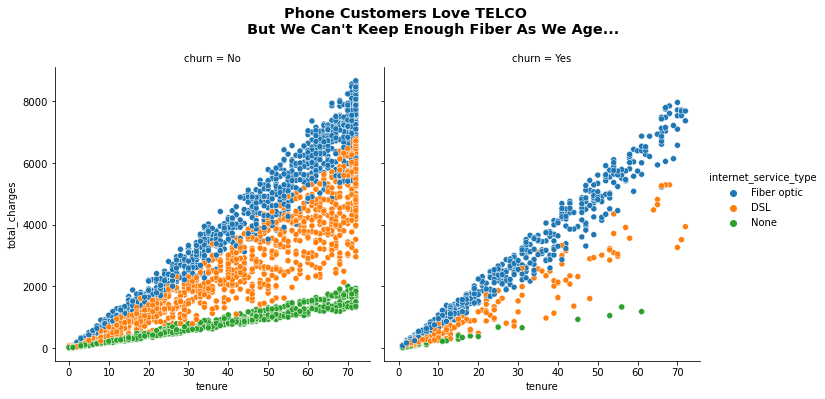

In [24]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='internet_service_type',
            hue_order=['Fiber optic', 'DSL', 'None'], 
            col='churn'
           ).fig.suptitle('Phone Customers Love TELCO\n\
           But We Can\'t Keep Enough Fiber As We Age...' ,
               fontsize = 'x-large' , 
               fontweight = 'bold' ,
                y= 1.1
                         )

plt.show()

  - Include your 3 best models in the final notebook to review. Show the steps and code you went through to fit the models, evaluate, and select.

In [25]:
df = prepare.fix_nulls()
df = prepare.prep_telco_1(df)
train, validate, test = prepare.split_data_model(df, 'churn1')

Prepared df: (7043, 16)

Train: (4057, 16)
Validate: (1409, 16)
Test: (1409, 16)


In [26]:
X_cols = train.columns.to_list()
X_cols.remove('churn1')
y_col = 'churn1'

In [27]:
X_cols

['senior',
 'partner',
 'dependents',
 'tenure',
 'e_bill',
 'monthly_charges',
 'total_charges',
 'DSL',
 'Fiber',
 'one_year',
 'two_year',
 'bank_transfer',
 'cc',
 'e_check',
 'add_ons']

In [28]:
y_col

'churn1'

In [29]:
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [30]:
# Let's find our baseline 
int(y_train.mode())

0

In [31]:
def random_forest_models(num_models, rand_st=123, positive=1, max_samp=1.0, trees=100):
    '''
    random_forest_models is a function that:
        
        Takes in:   num_models=  >> The number of rf models 
                                  you want to create  ;dtype(int)
                       rand_st=  >> Random State  
                                  ;dtype(int) = 123 unless specified
                      positive=  >> what is the positive test 
                                  (0 or 1)
                      max_samp=  >> maximum samples per tree
                                  ;dtype(int, float) = (default)1.0
                                  if int: = number of samples
                                  if float: = percentage of total samples
                         trees=  >> n_estimators: number of trees in the forest
        
Assumed variables apply:
    
                  train: training dataset
               validate: validate dataset
                   test: test dataset

                 X_cols = df.columns.drop('target_y').to_list()
                  y_col = 'target_y'

                X_train = train[X_cols]
                y_train = train[y_col]
                  X_val = validate[X_cols]
                  y_val = validate[y_col]
                 X_test = test[X_cols]
                 y_test = test[y_col]
                 
        Returns: a DataFrame with predictions for each model
    '''
    b = int(y_train.mode())
    preds = pd.DataFrame({
    'actual': y_train,
    'baseline': b,
    })
    depth = 11 #num_models * 2 + 1
#     fig, ax = plt.subplot(nrows = num_models,n)
    for i in range(1, num_models+1):
        depth -= 1
        name = f'model_{i}_depth_{depth}'
        
        rf = RandomForestClassifier(random_state = rand_st, 
                                    min_samples_leaf = i, 
                                    max_depth = depth,
                                    max_samples = max_samp,
                                    n_estimators = trees
                                   )
        rf.fit(X_train, y_train)
        
        preds[name] = rf.predict(X_train)
#         val_name = f'{name}_validate'
        TN, FP, FN, TP = confusion_matrix(preds.actual, preds[name]).ravel()
        print(f'\n{name}\n\n {rf}')
        confusion(TN=TN, TP=TP, FN=FN, FP=FP)
        print(f'Validation score is: {rf.score(X_validate, y_validate):.2%}')
        print('______________________________')
#         preds[val_name] = rf.predict(X_val)
#         plt.subplot(i,i,12)
#         plt.title(f'{name} feature importances')
#         plt.barh(X_train.columns, rf.feature_importances_)
#         plt.show
                
    return preds

In [32]:
preds = random_forest_models(9)


model_1_depth_10

 RandomForestClassifier(max_depth=10, max_samples=1.0, random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 779 ---- False Positive = 167
    True Negative = 2776 ---- False Negative = 335
    
    Out of 4057 predictions -- Correct predictions = 3555 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 946
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3111
     
        Accuracy = 87.63% -->> Correct Predictions / Total Predictions
       Precision = 82.35% -->> True Positive / Predicted Positive
             NPV = 89.23% -->> True Negative / Predicted Negative
          Recall = 69.93% -->> True Positive / Real Positive
     Specificity = 94.33% -->> True Negative / Real Negative
        f1-score = 75.63% -->> Harmonic Mean of Precision and Recall
    __________________________________________________


model_9_depth_2

 RandomForestClassifier(max_depth=2, max_samples=1.0, min_samples_leaf=9,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 143 ---- False Positive = 37
    True Negative = 2906 ---- False Negative = 971
    
    Out of 4057 predictions -- Correct predictions = 3049 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 180
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3877
     
        Accuracy = 75.15% -->> Correct Predictions / Total Predictions
       Precision = 79.44% -->> True Positive / Predicted Positive
             NPV = 74.95% -->> True Negative / Predicted Negative
          Recall = 12.84% -->> True Positive / Real Positive
     Specificity = 98.74% -->> True Negative / Real Negative
        f1-score = 22.10% -->> Harmonic Mean of Precision and Recall
    __________

In [33]:
rf_try_2 = RandomForestClassifier(max_depth=8, max_samples=0.85, min_samples_leaf=3,
                       n_estimators=1000, random_state=123)

rf_try_2.fit(X_train,y_train)

pred_try_2_train = rf_try_2.predict(X_train)

pred_try_2_validate = rf_try_2.predict(X_validate)

TN, FP, FN, TP = confusion_matrix(y_train, pred_try_2_train).ravel()
print(f'\nTrain on \n\n{rf_try_2}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, pred_try_2_validate).ravel()
print(f'\nValidate on \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)


Train on 

RandomForestClassifier(max_depth=8, max_samples=0.85, min_samples_leaf=3,
                       n_estimators=1000, random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 649 ---- False Positive = 248
    True Negative = 2695 ---- False Negative = 465
    
    Out of 4057 predictions -- Correct predictions = 3344 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 897
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3160
     
        Accuracy = 82.43% -->> Correct Predictions / Total Predictions
       Precision = 72.35% -->> True Positive / Predicted Positive
             NPV = 85.28% -->> True Negative / Predicted Negative
          Recall = 58.26% -->> True Positive / Real Positive
     Specificity = 91.57% -->> True Negative / Real Negative
        f1-score = 64.55% -->> Harmonic Mean of Precision and Recall


In [34]:
logit = LogisticRegression(random_state=123, C=1.0, solver='liblinear', penalty='l1')

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred

y_pred1 = logit.predict(X_validate)
y_pred1

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'\nTrain on \n\n{rf_try_2}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred1).ravel()
print(f'\nValidate on ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)


Train on 

RandomForestClassifier(max_depth=8, max_samples=0.85, min_samples_leaf=3,
                       n_estimators=1000, random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 594 ---- False Positive = 316
    True Negative = 2627 ---- False Negative = 520
    
    Out of 4057 predictions -- Correct predictions = 3221 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 910
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3147
     
        Accuracy = 79.39% -->> Correct Predictions / Total Predictions
       Precision = 65.27% -->> True Positive / Predicted Positive
             NPV = 83.48% -->> True Negative / Predicted Negative
          Recall = 53.32% -->> True Positive / Real Positive
     Specificity = 89.26% -->> True Negative / Real Negative
        f1-score = 58.70% -->> Harmonic Mean of Precision and Recall


In [35]:
X_train

,senior,partner,dependents,tenure,e_bill,monthly_charges,total_charges,DSL,Fiber,one_year,two_year,bank_transfer,cc,e_check,add_ons
5911,0,0,1,26,1,39.95,1023.75,1,0,1,0,1,0,0,1
2479,0,1,0,47,0,26.90,1250.85,0,0,1,0,0,0,1,0
5889,0,0,0,1,1,50.45,50.45,1,0,0,0,0,0,0,1
6087,0,0,0,69,1,60.05,4176.70,1,0,0,1,1,0,0,3
785,0,0,0,51,0,87.55,4475.90,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,1,1,1,60,1,80.95,4859.10,0,1,0,0,0,0,1,1
6102,0,1,0,2,0,79.70,165.00,0,1,0,0,1,0,0,2
356,1,0,0,52,1,50.50,2566.30,1,0,0,0,0,0,1,3
1756,0,0,0,4,1,70.20,237.95,0,1,0,0,0,0,1,0


In [36]:
X_train_fiber = X_train[X_train.Fiber == 1]
X_train_fiber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850 entries, 785 to 1756
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior           1850 non-null   int64  
 1   partner          1850 non-null   int64  
 2   dependents       1850 non-null   int64  
 3   tenure           1850 non-null   int64  
 4   e_bill           1850 non-null   int64  
 5   monthly_charges  1850 non-null   float64
 6   total_charges    1850 non-null   float64
 7   DSL              1850 non-null   uint8  
 8   Fiber            1850 non-null   uint8  
 9   one_year         1850 non-null   uint8  
 10  two_year         1850 non-null   uint8  
 11  bank_transfer    1850 non-null   uint8  
 12  cc               1850 non-null   uint8  
 13  e_check          1850 non-null   uint8  
 14  add_ons          1850 non-null   int64  
dtypes: float64(2), int64(6), uint8(7)
memory usage: 142.7 KB


In [37]:
y_train_fiber = y_train
y_train_fiber

5911    0
2479    0
5889    1
6087    0
785     0
       ..
5269    0
6102    1
356     0
1756    1
2127    0
Name: churn1, Length: 4057, dtype: int64

In [38]:
y_train_fiber.drop(index=X_train[X_train.Fiber != 1].index.tolist(), inplace=True)

In [39]:
y_train_fiber

785     0
3057    0
5757    1
3465    1
1539    0
       ..
4308    0
4998    0
5269    0
6102    1
1756    1
Name: churn1, Length: 1850, dtype: int64

In [40]:
logit = LogisticRegression(random_state=123, C=1.0, solver='liblinear', penalty='l1')

logit.fit(X_train_fiber, y_train_fiber)

y_pred = logit.predict(X_train_fiber)
# y_pred # Check √

y_pred_validate = logit.predict(X_validate)
# y_pred_validate # Check √

y_pred_test = logit.predict(X_test)
# y_pred_test # Check √

TN, FP, FN, TP = confusion_matrix(y_train_fiber, y_pred).ravel()
print(f'\nTrain Scores: \n\n{rf_try_2}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred_validate).ravel()
print(f'\nValidate Scores: ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)

TNt, FPt, FNt, TPt = confusion_matrix(y_test, y_pred_test).ravel()
print(f'\nTest Scores:') # \n\n {rf_try_2}')
confusion(TN=TNt, TP=TPt, FN=FNt, FP=FPt)


Train Scores: 

RandomForestClassifier(max_depth=8, max_samples=0.85, min_samples_leaf=3,
                       n_estimators=1000, random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 533 ---- False Positive = 263
    True Negative = 815 ---- False Negative = 239
    
    Out of 1850 predictions -- Correct predictions = 1348 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 772 ---- PREDICTED POSITIVE = (TP + FP) = 796
    
    REAL NEGATIVE = (TN + FP) = 1078 ---- PREDICTED NEGATIVE = (TN + FN) = 1054
     
        Accuracy = 72.86% -->> Correct Predictions / Total Predictions
       Precision = 66.96% -->> True Positive / Predicted Positive
             NPV = 77.32% -->> True Negative / Predicted Negative
          Recall = 69.04% -->> True Positive / Real Positive
     Specificity = 75.60% -->> True Negative / Real Negative
        f1-score = 67.98% -->> Harmonic Mean of Precision and Reca

  - On your best model, a chart visualizing how it performed on test would be valuable.

# What are some of our takeaways thus far?

  - Things that aren't related to churn...
    - gender - they churn evenly
      - Can probably drop this field and not use it as a feature
    - phone servie
      - Everyone has phone service except a portion of the DSL customers
    - multiple lines
      - Multiple lines seems to line up with the DSL customers that do have phone
  - Things that don't matter much...
    - senior citizens - don't make up a great deal of customers
    - Streaming_tv
    - Streaming_movies
  - Things that seem to have a relationship to churn...
    - partner - no partner has more churn
    - dependents - no dependents has more churn
    - Fiber - DSL - No ISP 42%/19%/8% Churn
    - online backup      - not having leads to churn
    - online security    - not having leads to churn
    - device protection  - not having leads to churn
    - tech support       - not having leads to churn
    - Electronic check seems to be the LARGEST indicator of churn
      - 45% of customers using E-checks churn

1. We can look into monthly charges of segments of the customer base, control for internet types, and phone services

Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>